## Churn in the Telecom Industry
The aim of this project is to predict which customers have churned from a fictitious telecommunications company, based on various attributes related to the service that each costumer has consumed. Also, the performance between two classification models was compared to increase the accuracy of the prediction.

In [150]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split, RandomizedSearchCV, KFold
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay
from sklearn.metrics import roc_curve, roc_auc_score

df = pd.read_csv(r'C:\Users\acker\Datasets\telecom_churn.csv')
df.head()

,Churn,AccountWeeks,ContractRenewal,DataPlan,DataUsage,CustServCalls,DayMins,DayCalls,MonthlyCharge,OverageFee,RoamMins
0,0,128,1,1,2.7,1,265.1,110,89.0,9.87,10.0
1,0,107,1,1,3.7,1,161.6,123,82.0,9.78,13.7
2,0,137,1,0,0.0,0,243.4,114,52.0,6.06,12.2
3,0,84,0,0,0.0,2,299.4,71,57.0,3.10,6.6
4,0,75,0,0,0.0,3,166.7,113,41.0,7.42,10.1


### Checking null values

In [151]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3333 entries, 0 to 3332
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Churn            3333 non-null   int64  
 1   AccountWeeks     3333 non-null   int64  
 2   ContractRenewal  3333 non-null   int64  
 3   DataPlan         3333 non-null   int64  
 4   DataUsage        3333 non-null   float64
 5   CustServCalls    3333 non-null   int64  
 6   DayMins          3333 non-null   float64
 7   DayCalls         3333 non-null   int64  
 8   MonthlyCharge    3333 non-null   float64
 9   OverageFee       3333 non-null   float64
 10  RoamMins         3333 non-null   float64
dtypes: float64(5), int64(6)
memory usage: 286.6 KB


### Correlations

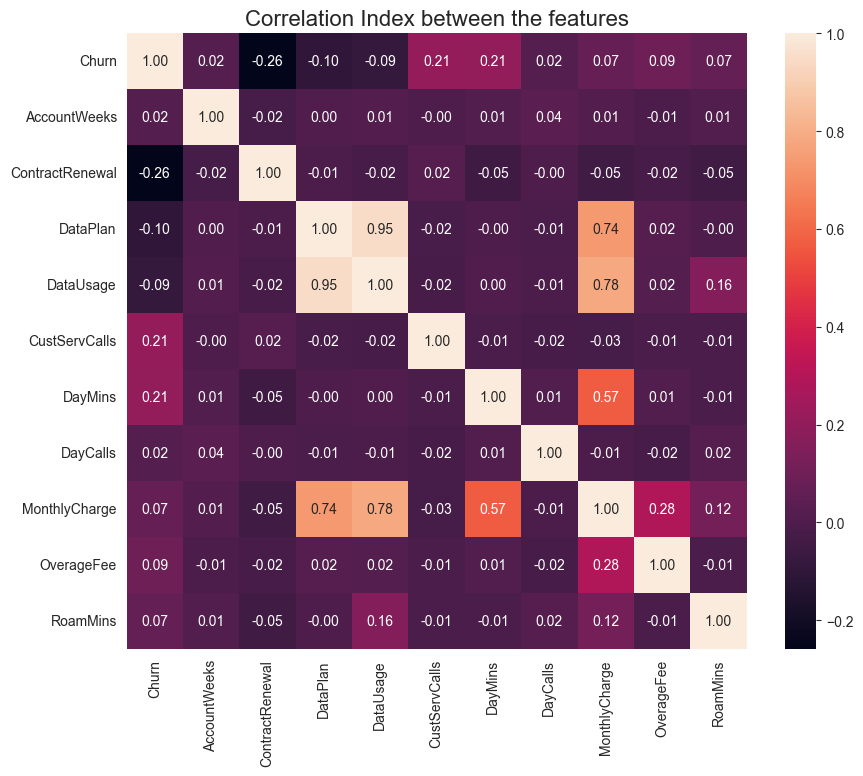

In [152]:
plt.figure(figsize=(10, 8))
sns.heatmap(df.corr(), annot=True, fmt='.2f')
plt.title('Correlation Index between the features', fontsize=16)
plt.show()

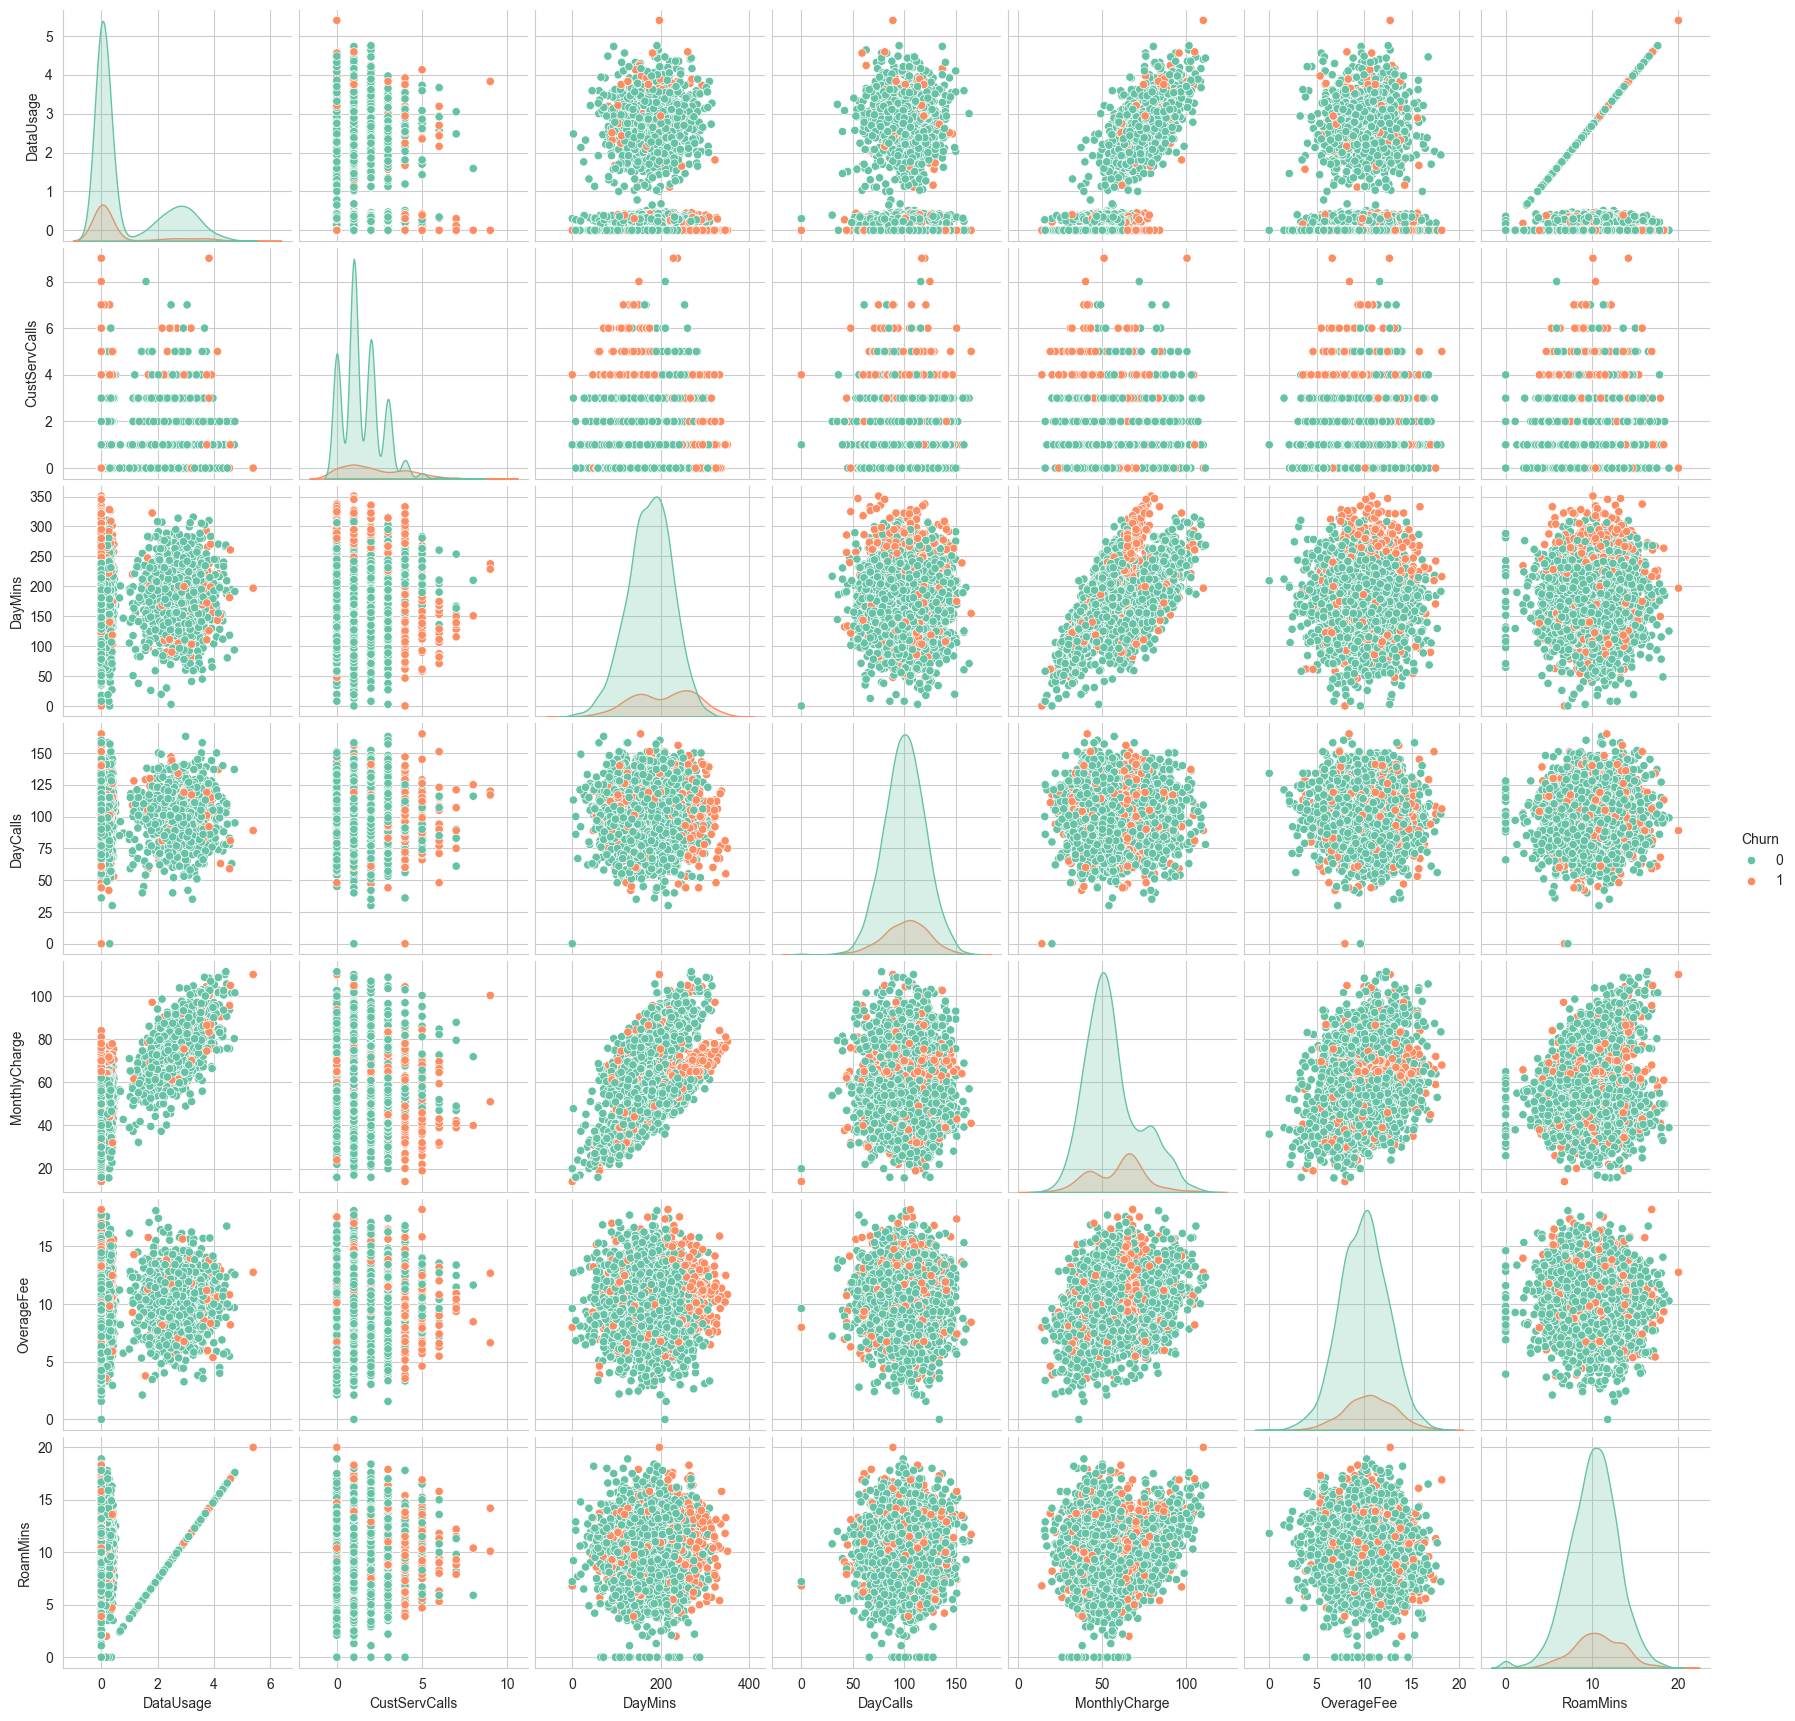

In [153]:
sns.set_palette('Set2')
sns.pairplot(df, vars=['DataUsage', 'CustServCalls', 'DayMins', 'DayCalls', 'MonthlyCharge', 'OverageFee', 'RoamMins'], hue='Churn')
plt.show()

[]

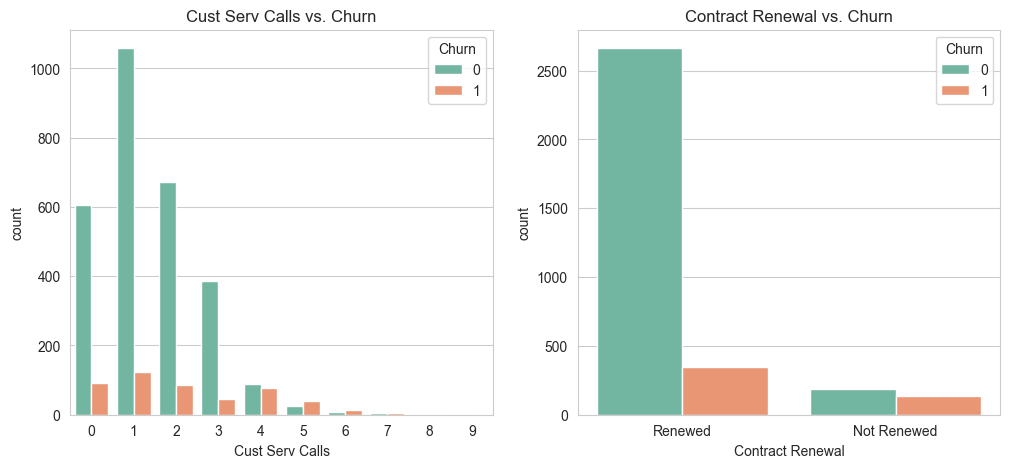

In [154]:
sns.set_palette('Set2')
sns.set_style('whitegrid')
fig, axes = plt.subplots(1, 2, figsize=(12, 5))
sns.countplot(data=df, x='CustServCalls', hue='Churn', ax=axes[0])
axes[0].set_title('Cust Serv Calls vs. Churn')
axes[0].set_xlabel('Cust Serv Calls')
df_plot = df.copy()
df_plot['ContractRenewal'] = df_plot['ContractRenewal'].map({1: 'Renewed', 0: 'Not Renewed'})
sns.countplot(data=df_plot, x='ContractRenewal', hue='Churn', ax=axes[1])
axes[1].set_title('Contract Renewal vs. Churn')
axes[1].set_xlabel('Contract Renewal')
plt.savefig('analise_churn_servico_contrato.png', dpi=300, bbox_inches='tight')
plt.plot()

As seen in the first graphics, as the number of calls into customer service increase, the chance of churn also increase. However, the second barplot shows that customers having the contract renewed are likely to continue with the service.

### Machine Learning Methods considered
* K Neighbors Classifier (KNN)
* Logistic Regression

### K-Nearest Neighbors

[]

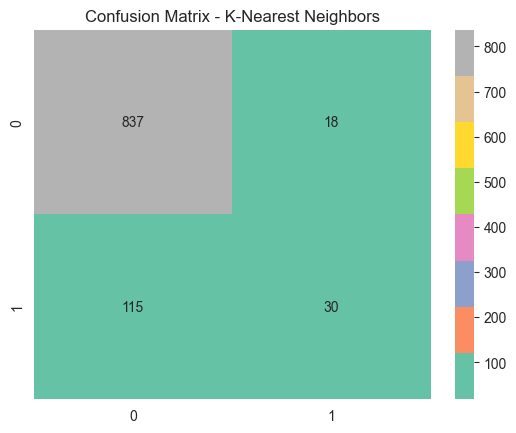

In [155]:
X = df.drop('Churn', axis=1)
y = df['Churn']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)
knn = KNeighborsClassifier(n_neighbors=12)

knn.fit(X_train, y_train)
score = knn.score(X_test, y_test)
pred_y_knn = knn.predict(X_test)
matrix_knn = confusion_matrix(y_test, pred_y_knn)
sns.heatmap(matrix_knn, fmt='d', annot=True, cmap='Set2')
plt.title('Confusion Matrix - K-Nearest Neighbors')
plt.plot()

### KNN Scale

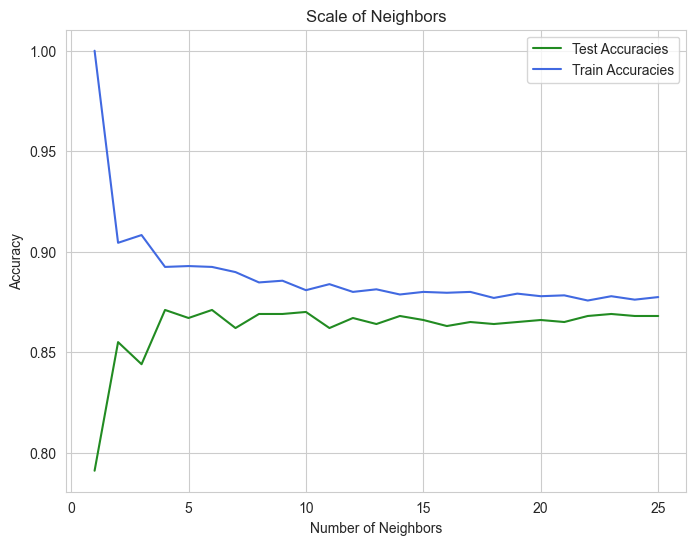

In [156]:
test_accuracies = {}
train_accuracies = {}
neighbors = np.arange(1, 26)
for neighbor in neighbors:
    knn = KNeighborsClassifier(n_neighbors=neighbor)
    knn.fit(X_train, y_train)
    test_accuracies[neighbor] = knn.score(X_test, y_test)
    train_accuracies[neighbor] = knn.score(X_train, y_train)

plt.figure(figsize=(8, 6))
plt.title('Scale of Neighbors')
plt.plot(neighbors, test_accuracies.values(), label='Test Accuracies', color='forestgreen')
plt.plot(neighbors, train_accuracies.values(), label='Train Accuracies', color='royalblue')
plt.legend()
plt.xlabel('Number of Neighbors')
plt.ylabel('Accuracy')
plt.show()

In [157]:
kf = KFold(n_splits=5, shuffle=True, random_state=42)
param_grid = {'n_neighbors': np.arange(1, 21)}
knn = KNeighborsClassifier()
knn_cv = RandomizedSearchCV(knn, param_grid, cv=kf, n_iter=10, random_state=42)
knn_cv.fit(X_train, y_train)
print(f'best param: {knn_cv.best_params_}, best score: {knn_cv.best_score_}')

best param: {'n_neighbors': np.int64(12)}, best score: 0.8752763966878347


In [158]:
print(classification_report(y_test, pred_y_knn))

              precision    recall  f1-score   support

           0       0.88      0.98      0.93       855
           1       0.62      0.21      0.31       145

    accuracy                           0.87      1000
   macro avg       0.75      0.59      0.62      1000
weighted avg       0.84      0.87      0.84      1000



### Logistic Regression

[]

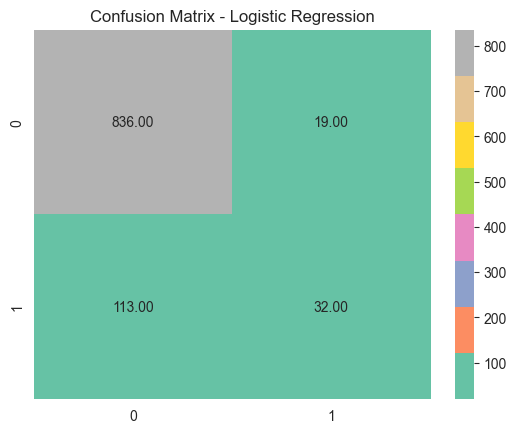

In [159]:
logreg = LogisticRegression(max_iter=1000)
logreg.fit(X_train, y_train)
pred_y_logreg = logreg.predict(X_test)
matrix_logreg = confusion_matrix(y_test, pred_y_logreg)
sns.heatmap(matrix_logreg, annot=True, fmt='.2f', cmap='Set2')
plt.title('Confusion Matrix - Logistic Regression')
plt.plot()

In [160]:
print(classification_report(y_test, pred_y_logreg))

              precision    recall  f1-score   support

           0       0.88      0.98      0.93       855
           1       0.63      0.22      0.33       145

    accuracy                           0.87      1000
   macro avg       0.75      0.60      0.63      1000
weighted avg       0.84      0.87      0.84      1000



### Adding both predictions into the original dataframe

In [161]:
knn = KNeighborsClassifier(n_neighbors=12)
knn.fit(X_train, y_train)  
KNN_pred_y = knn.predict(X)
df.insert(loc=0, column='KNNPredictedChurn', value=KNN_pred_y)

logreg = LogisticRegression(max_iter=1000)
logreg.fit(X_train, y_train)
logreg_pred_y = logreg.predict(X)
df.insert(loc=0, column='LogregPredictedChurn', value=logreg_pred_y)

### ROC Curve and AUC

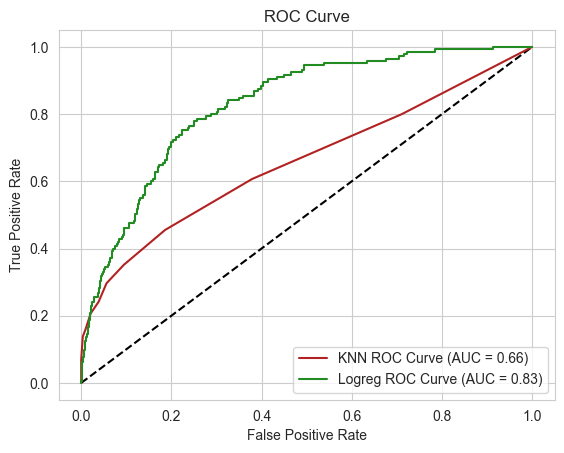

In [162]:
y_pred_prob = knn.predict_proba(X_test)[:, 1]
knn_auc = roc_auc_score(y_test, y_pred_prob)
y_pred_prob_logreg = logreg.predict_proba(X_test)[:, 1]
logreg_auc = roc_auc_score(y_test, y_pred_prob_logreg)

fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)
fpr_logreg, tpr_logreg, thresholds = roc_curve(y_test, y_pred_prob_logreg)
plt.plot([0, 1], [0, 1], 'k--')
plt.plot(fpr, tpr, label=f'KNN ROC Curve (AUC = {knn_auc:.2f})', color='firebrick')
plt.plot(fpr_logreg, tpr_logreg, label=f'Logreg ROC Curve (AUC = {logreg_auc:.2f})', color='forestgreen')
plt.legend(loc='lower right')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.savefig('ROC_Curves.png', dpi=100, bbox_inches='tight')
plt.show()

### Considerations:

K-Nearest Neighbors:
* AUC: 0.66
* Explainability: easy
* Risk: overfitting

Logistic Regression:
* AUC: 0.83
* F1-score: slightly better
* Explainability: easy
* Risk: can struggle with non-linear relationships

### Hit rate: K Neighbors Classifier vs Logistic Regression

In [163]:
hits = 0
for x in range(len(df['KNNPredictedChurn'])):
    if df['KNNPredictedChurn'][x] == df['Churn'][x]:
        hits += 1

total = len(df['KNNPredictedChurn'])
hit_rate = (hits/total)*100
print(f'K-Nearest Neighbors hits number: {hits}')
print(f'Total: {total}')
print(f'Hit rate: {hit_rate:.2f} %')

K-Nearest Neighbors hits number: 2920
Total: 3333
Hit rate: 87.61 %


In [164]:
hits = 0
for x in range(len(df['LogregPredictedChurn'])):
    if df['LogregPredictedChurn'][x] == df['Churn'][x]:
        hits += 1

total = len(df['LogregPredictedChurn'])
hit_rate = (hits/total)*100
print(f'Logistic Regression hits number: {hits}')
print(f'Total: {total}')
print(f'Hit rate: {hit_rate:.2f} %')

Logistic Regression hits number: 2874
Total: 3333
Hit rate: 86.23 %


In [165]:
df.head()

,LogregPredictedChurn,KNNPredictedChurn,Churn,AccountWeeks,ContractRenewal,DataPlan,DataUsage,CustServCalls,DayMins,DayCalls,MonthlyCharge,OverageFee,RoamMins
0,0,0,0,128,1,1,2.7,1,265.1,110,89.0,9.87,10.0
1,0,0,0,107,1,1,3.7,1,161.6,123,82.0,9.78,13.7
2,0,0,0,137,1,0,0.0,0,243.4,114,52.0,6.06,12.2
3,1,0,0,84,0,0,0.0,2,299.4,71,57.0,3.10,6.6
4,1,0,0,75,0,0,0.0,3,166.7,113,41.0,7.42,10.1


### Conclusions
The Logistic Regression model provides a satisfying score with an AUC of 0.83. Furthermore, for the proposal, the model achieves great accuracy identifying churn customers, making it a good choice for scalability purposes.